In [8]:
import torch
import torch.utils.data as data
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torchvision import datasets,transforms
import matplotlib.pyplot as plt

In [9]:
train_loader = data.DataLoader(
    dataset=datasets.CIFAR10(root='./data',train=True,transform=transforms.ToTensor(),download=False),batch_size=128,shuffle=True)
test_loader = data.DataLoader(
    dataset=datasets.CIFAR10(root='./data',train=False,transform=transforms.ToTensor(),download=False),batch_size=128,shuffle=True)

In [10]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1   = nn.Linear(16*5*5, 120)
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = F.max_pool2d(out, 2)
        out = F.relu(self.conv2(out))
        out = F.max_pool2d(out, 2)
        out = out.view(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out

In [11]:
net = CNN()

In [12]:
def test():
    net.eval()
    with torch.no_grad():
        result = []
        for data,target in test_loader:
            output = net(data)
            pre = output.max(1, keepdim=True)[1].view(-1)
            result.extend(pre.numpy() == target.numpy())
        print("Accuracy : {}".format(sum(result) / len(result)))

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters())       

In [14]:
def train(epoch):
    print('\nEpoch: %d' % epoch)
    net.train()
    train_loss = 0
    correct = 0
    total = 0
    for batch_idx, (inputs, targets) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = outputs.max(1)
        total += targets.size(0)
        correct += predicted.eq(targets).sum().item()
        
        test()

# 整理一下train方法和test方法的写法
# 输出一下中间层
# 调用一下ResNet和AlexNet之类的

In [24]:
for i in range(2):
    train(i)


Epoch: 0
Accuracy : 0.3124
Accuracy : 0.3145
Accuracy : 0.3282
Accuracy : 0.309
Accuracy : 0.2962
Accuracy : 0.3047
Accuracy : 0.3249
Accuracy : 0.308
Accuracy : 0.2826
Accuracy : 0.2992
Accuracy : 0.2928
Accuracy : 0.2857
Accuracy : 0.289
Accuracy : 0.2942
Accuracy : 0.3124
Accuracy : 0.3222
Accuracy : 0.3136
Accuracy : 0.2999
Accuracy : 0.3107
Accuracy : 0.3238
Accuracy : 0.3243
Accuracy : 0.3208
Accuracy : 0.3265
Accuracy : 0.3239
Accuracy : 0.33
Accuracy : 0.3359
Accuracy : 0.336
Accuracy : 0.3348
Accuracy : 0.3372
Accuracy : 0.337
Accuracy : 0.3386
Accuracy : 0.34
Accuracy : 0.3337
Accuracy : 0.3277
Accuracy : 0.3281
Accuracy : 0.3316
Accuracy : 0.3351
Accuracy : 0.3451
Accuracy : 0.3347
Accuracy : 0.3321
Accuracy : 0.341
Accuracy : 0.3392
Accuracy : 0.3353
Accuracy : 0.334
Accuracy : 0.3361
Accuracy : 0.3385
Accuracy : 0.3377
Accuracy : 0.324
Accuracy : 0.3218
Accuracy : 0.3331
Accuracy : 0.3383
Accuracy : 0.3317
Accuracy : 0.3358
Accuracy : 0.3436
Accuracy : 0.3391
Accuracy : 0

Accuracy : 0.4358
Accuracy : 0.4299
Accuracy : 0.4237
Accuracy : 0.428
Accuracy : 0.4329
Accuracy : 0.4352
Accuracy : 0.4382
Accuracy : 0.4336
Accuracy : 0.4283
Accuracy : 0.4319
Accuracy : 0.4342
Accuracy : 0.432
Accuracy : 0.4282
Accuracy : 0.431
Accuracy : 0.4327
Accuracy : 0.4358
Accuracy : 0.4327
Accuracy : 0.4257
Accuracy : 0.4245
Accuracy : 0.4307
Accuracy : 0.436
Accuracy : 0.4379
Accuracy : 0.4302
Accuracy : 0.4327
Accuracy : 0.43
Accuracy : 0.4308
Accuracy : 0.4352
Accuracy : 0.434
Accuracy : 0.4251
Accuracy : 0.413
Accuracy : 0.4112
Accuracy : 0.4244
Accuracy : 0.4345
Accuracy : 0.4385
Accuracy : 0.426
Accuracy : 0.4203
Accuracy : 0.4166
Accuracy : 0.4295
Accuracy : 0.4411
Accuracy : 0.4447
Accuracy : 0.4359
Accuracy : 0.4282
Accuracy : 0.4206
Accuracy : 0.4171
Accuracy : 0.407
Accuracy : 0.4109
Accuracy : 0.4181
Accuracy : 0.42
Accuracy : 0.4191
Accuracy : 0.4206
Accuracy : 0.4282
Accuracy : 0.4399
Accuracy : 0.4507
Accuracy : 0.4453
Accuracy : 0.4364
Accuracy : 0.4253
Accu

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


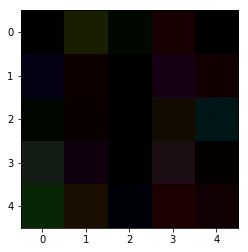

In [25]:
img = net.conv1.weight[0]
img = img.detach().numpy()
img = np.transpose(img, (1,2,0))
plt.imshow(img)
plt.show()